<a href="https://colab.research.google.com/github/UpendraVishwanathYS/IISc_Deep_Learning_Course_Assignment/blob/main/M1_AST_07_Numerical_Optimization_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 7: Numerical Optimization

## Learning Objectives

At the end of the assignment, you will be able to


*   understand Newton-Raphson Method

*   understand the Multivariate Newton Optimization Method

* understand the steepest descent algorithm with exact line search
method



### Setup Steps:

In [ ]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [ ]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [ ]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M1_AST_07_Numerical_Optimization_A" #name of the notebook

def setup():
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://learn-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



### Importing required packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve
import sys

### Newton-Raphson Method

Newton's method is a root finding method that uses linear approximation



Let $f(x)$ be a smooth and continuous function and $x_{r}$ be an unknown root of $f(x)$.  Now assume that $x_{0}$ is a guess for $x_{r}$. Unless x0 is a very lucky guess. Unless $x_{0}$ is a very lucky guess, $f(x_{0})$ will not be a root. Given this scenario, we want to find an $x_{1}$ that is an improvement on $x_{0}$  (i.e., closer to $x_{r}$ than $x_{0}$). If we assume that $x_{0}$ is “close enough” to $x_{r}$, then we can improve upon it by taking the linear approximation of $f(x)$ around $x_{0}$, which is a line, and finding the intersection of this line with the x-axis. Written out, the linear approximation of $f(x)$ around $x_{0}$ is $f(x) ≈ f(x_{0})+f′(x_{0})(x−x_{0}).$ Using this approximation, we find $x_{1}$ such that $f(x_{1}) = 0.$ Plugging these values into the linear approximation results in the equation:

<br>
<center>

$0 = f(x_{0}) + f′(x_{0})(x_{1} - x_{0}),$

</center>

which when solved for $x_{1}$ is

<center>
$x_{1} = x_{0} - \frac{f(x_{0})}{f′(x_{0})}$

</center>
<br>

An illustration of how this linear approximation improves an initial guess is shown in the following figure.
<br>

<center>

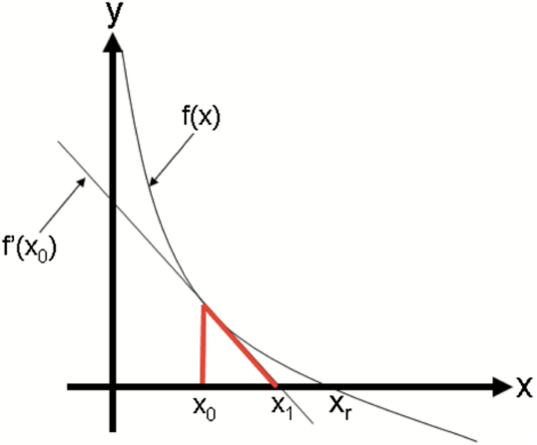

</center>


Written generally, a Newton step computes an improved guess, xi, using a previous guess xi−1, and is given by the equation

<center>
$x_{i} = x_{i - 1} - \frac{g(x_{i-1})}{g′(x_{i - 1})}$

</center>
<br>

The **Newton-Raphson Method** of finding roots iterates Newton steps from $x_{0}$ until the error is less than the tolerance.


1. Given the function $f(x) =  x^{3} - x^{2} - 1$. Use the Newton-Raphson method to find a root of the function $f(x)$, starting at intial guess $x_{0} =  1$.

In [8]:
# Defining Newton's function which takes 5 input parameters f, Df, x0, epsilon and max_iter
# and returns an approximation of a solution of by Newton's method.
def newton(f, Df, x0, epsilon, max_iter):
    '''Approximate solution of f(x)=0 by Newton's method.

    Parameters
    ----------
    f : function
        Function for which we are searching for a solution f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number
        Stopping criteria is abs(f(x)) < epsilon.
    max_iter : integer
        Maximum number of iterations of Newton's method.

    Returns
    -------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn - f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.
    '''
    xn = x0
    for n in range(0, max_iter):
        # YOUR CODE HERE
        fxn = f(xn)
        if abs(fxn) < epsilon:
            print(f"Converged after {n} iterations.")
            return xn
        Dfxn = Df(xn)
        if Dfxn == 0:
            print("Zero derivative. No solution found.")
            return None
        xn = xn - fxn / Dfxn
    print("Exceeded maximum iterations. No solution found.")
    return None

In [9]:
p = lambda x: x**3 - x**2 - 1
Dp = lambda x: 3*x**2 - 2*x
approx = newton(p, Dp, 1, 1e-10, 10)
print(approx)

Converged after 6 iterations.
1.4655712318767877


2. Consider the function $f(x) =  x^{3} - x^{2} - 1$. Does this function have a local minima or global minima? At what point you get the local or global minima?

**Hint:** Try to plot the function

In [3]:
# Newton's method
# Defining the function
def func(x):
    return x * x * x - x * x - 1

In [4]:
# Derivative of the above function
# which is 3*x^x - 2*x
def derivFunc(x):
    return 3 * x * x - 2 * x

In [5]:
# Second order derivative
def secondderivFunc(x):
    return 6 * x - 2

In [10]:
# Function to find the root
def newtonRaphson(x):
    iteration_counter = 0

    while iteration_counter < 100:
        try:
            h = derivFunc(x) / secondderivFunc(x)
        except ZeroDivisionError:
            print("Error! - Second derivative is zero for x =", x)
            sys.exit(1)

        if abs(h) < 0.0001:
            break

        x = x - h
        iteration_counter += 1

        # Print each iteration
        print(f"Iteration {iteration_counter} \t x = {x:.6f}")

    # Result
    if iteration_counter < 100:
        print("The minima occurs at x =", round(x, 4))
        print("Minimum value is:", round(func(x), 4))
    else:
        print("Did not converge within the maximum number of iterations.")

x0 = 5 # Initial values assumed
newtonRaphson(x0)

Iteration 1 	 x = 2.678571
Iteration 2 	 x = 1.529641
Iteration 3 	 x = 0.977926
Iteration 4 	 x = 0.741817
Iteration 5 	 x = 0.673579
Iteration 6 	 x = 0.666737
The minima occurs at x = 0.6667
Minimum value is: -1.1481


### Multivariate Newton Optimization method

In [11]:
from sympy import Derivative
x1, x2 = symbols('x1 x2')
expr = x1 - x2 + 2*x1*x2 + 2*x1**2 + x2**2
print(f"Expression : {expr} ")

Expression : 2*x1**2 + 2*x1*x2 + x1 + x2**2 - x2 


In mathematics, the Hessian matrix or Hessian is a square matrix of second-order partial derivatives of a scalar-valued function, or scalar field.


  \begin{equation*}H(x) = \begin{bmatrix} f_{xx}\,\,\, f_{xy} \\ f_{yx} \,\,\,f_{yy}\end{bmatrix} =   \begin{bmatrix} \frac{∂f} {∂x^{2} } \frac{∂f} {∂x∂y}\\  \frac{∂f}  {∂y∂x } \frac{∂f} {∂y^{2} }  \end{bmatrix}
  \end{equation*}

In [24]:
import sympy as sp
def Hessian_matrix(x01, x02):
  x1, x2 = symbols('x1 x2')
  expr = x1 - x2 + 2*x1*x2 + 2*x1**2 + x2**2
  f_xx = Derivative(expr, x1, x1).doit()
  f_xy = Derivative(expr, x1, x2).doit()
  f_yx = Derivative(expr, x2, x1).doit()
  f_yy = Derivative(expr, x2, x2).doit()

  Hxy = sp.Matrix([
        [f_xx.subs({x1: x01, x2: x02}), f_xy.subs({x1: x01, x2: x02})],
        [f_yx.subs({x1: x01, x2: x02}), f_yy.subs({x1: x01, x2: x02})]
    ])

  return Hxy

In [25]:
Hessian = Hessian_matrix(0.1,0.2)
Hxy = Hessian
print(Hxy)

Matrix([[4, 2], [2, 2]])


The gradient of a function is a vector field. It is obtained by applying the vector operator V to the scalar function f(x, y). Such a vector field is called a gradient (or conservative) vector field.

\begin{equation*} \bigtriangledown f = \begin{bmatrix} \frac {∂f}   {\partial x} \\ \frac {∂f}   {\partial y}\end{bmatrix} \end{equation*}

In [27]:
def gradientf():
    # Define variables
    x, y = sp.symbols('x y')

    # Define the function
    f = x - y + 2*x*y + 2*x**2 + y**2

    # Compute partial derivatives
    dfx = sp.diff(f, x)
    dfy = sp.diff(f, y)

    # Optional: return as a list (gradient vector)
    gradf = [dfx, dfy]

    return dfx, dfy

In [31]:
# Gradient
df_x1 = sp.diff(expr, x1)
df_x2 = sp.diff(expr, x2)
print(f"\nGradient:\n{df_x1}\n{df_x2}")

# Hessian matrix
hessian = sp.hessian(expr, (x1, x2))
print(f"\nHessian Matrix:\n{hessian}")


Gradient:
4*x1 + 2*x2 + 1
2*x1 + 2*x2 - 1

Hessian Matrix:
Matrix([[4, 2], [2, 2]])


### Newton Optimization for Multi Variate equation






 \begin{equation*} X^{new} = X^{old} - H^{-1}  \bigtriangledown f     \end{equation*}  
 \begin{equation*} where \,\, X = \begin{bmatrix} x1 \\ x2 \end{bmatrix}  \end{equation*}

In [35]:
i = 10
# Compute symbolic gradient and Hessian
dfx = sp.diff(expr, x1)
dfy = sp.diff(expr, x2)
gradf_expr = sp.Matrix([dfx, dfy])
hessian_expr = hessian

x0 = np.array([0.001,0.002])
print(type(x0[0]))

for m in range(i):
  print(f"\nIteration {m+1}")
  gradientoff = []
  # Evaluate gradient and Hessian at current point
  subs = {x1: x0[0], x2: x0[1]}
  gradf = np.array(gradf_expr.subs(subs)).astype(np.float64).reshape(-1)
  H = np.array(hessian_expr.subs(subs)).astype(np.float64)

  print(f"x0 : {x0}")
  print(f"Gradient : {gradf}")

  try:
      inverse = np.linalg.inv(H)

  except np.linalg.LinAlgError:
      print("Hessian is not invertible. Stopping.")
      break

  h = np.dot(inverse, gradf)

  if h.all() == 0 :
    print(f"Objective function converged\nConverged in {m+1} iterations")
    print(f"Points at which the objective function is converged : {x0}")
    break

  xn = x0 - h
  # print(f"xn : {xn}")
  x0 = xn

<class 'numpy.float64'>

Iteration 1
x0 : [0.001 0.002]
Gradient : [ 1.008 -0.994]

Iteration 2
x0 : [-1.   1.5]
Gradient : [4.4408921e-16 0.0000000e+00]

Iteration 3
x0 : [-1.   1.5]
Gradient : [4.4408921e-16 4.4408921e-16]
Objective function converged
Converged in 3 iterations
Points at which the objective function is converged : [-1.   1.5]


**Line search** method is an iterative approach to find a local minimum of a multidimensional nonlinear function using the function's gradients. It computes a search direction and then finds an acceptable step length that satisfies certain standard conditions.


Line search method can be categorized into exact and inexact methods. The exact method, as in the name, aims to find the exact minimizer at each iteration; while the inexact method computes step lengths to satisfy conditions including Wolfe and Goldstein conditions. Line search and trust-region methods are two fundamental strategies for locating the new iterate given the current point. With the ability to solve the unconstrained optimization problem, line search is widely used in many cases including machine learning, game theory and other fields.

### Exact Line  Search

#### Steepest Descent Method

Given the intuition that the negative gradient $ - \nabla f_{k}$ can be an effective search direction, steepest descent follows the idea and establishes a systematic method for minimizing the objective function. Setting $ - \nabla f_{k}$ as the direction, steepest descent computes the step-length $\alpha_{k}$ by minimizing a single-variable objective function. More specifically, the steps of Steepest Descent Method are as follows:

**Steepest Descent Algorithm:**


![Img](https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/Line_Search.png)











1. Given the objective function is $ x_{1} - x_{2} + 2 x_{1}  x_{2} + 2 x_{1}^2 +  x_{2}^2  $

In [36]:
# Define objective function
def f(x):
    # YOUR CODE HERE
    return x[0] - x[1] + 2 * x[0] * x[1] + 2 * x[0]**2 + x[1]**2

# Define objective gradient
def dfdx(x):
    # YOUR CODE HERE
    grad = np.zeros(2)
    grad[0] = -2 * x[1] + 2 * x[0] + 2 * x[0]**2
    grad[1] = -2 * x[0] + 2 * x[1]
    return grad

# Exact 2nd derivatives (hessian)
H = [[2.0, -2.0],[-2.0, 8.0]]

# Start location/ Starting point
# x_start = [-3.0, 2.0]
x_start = [0.0, 0.0]

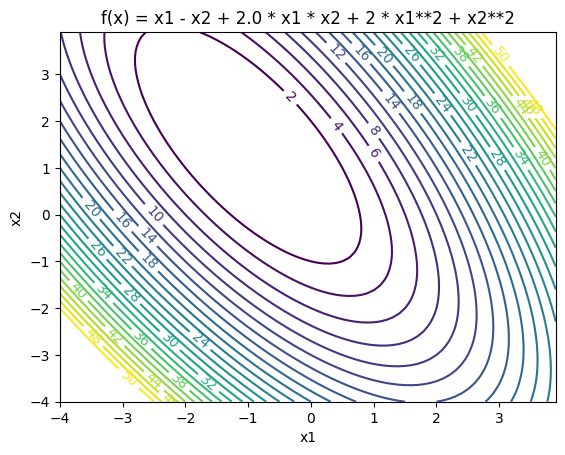

In [37]:
# Design variables at mesh points
i1 = np.arange(-4.0, 4.0, 0.1)
i2 = np.arange(-4.0, 4.0, 0.1)
x1_mesh, x2_mesh = np.meshgrid(i1, i2)
#f_mesh = x1_mesh**2 - 2.0 * x1_mesh * x2_mesh + 4 * x2_mesh**2
f_mesh = x1_mesh - x2_mesh + 2.0 * x1_mesh * x2_mesh + 2 * x1_mesh**2 + x2_mesh**2

# Create a contour plot
plt.figure()

# Specify contour lines
lines = range(2,52,2)

# Plot contours
CS = plt.contour(x1_mesh, x2_mesh, f_mesh, lines)

# Label contours
plt.clabel(CS, inline=1, fontsize=10)

# Add some text to the plot
plt.title("f(x) = x1 - x2 + 2.0 * x1 * x2 + 2 * x1**2 + x2**2")
plt.xlabel("x1")
plt.ylabel("x2");

### Steepest Descent Method

Iteration: 0
f(x1) =  -1.0*a + 0.5*(1 - a)**2 + 0.75
alpha [2.00000000000000]
New values = [-0.5  0.5]
Vector norm: 0.5


Iteration: 1
f(x1) =  3.5*a + 4.0*(0.25 - a)**2 + (0.5 - 2.0*a)*(3.0*a - 1.0) + 4.5*(a - 0.333333333333333)**2 - 1.0
alpha []
No valid step size found, stopping.


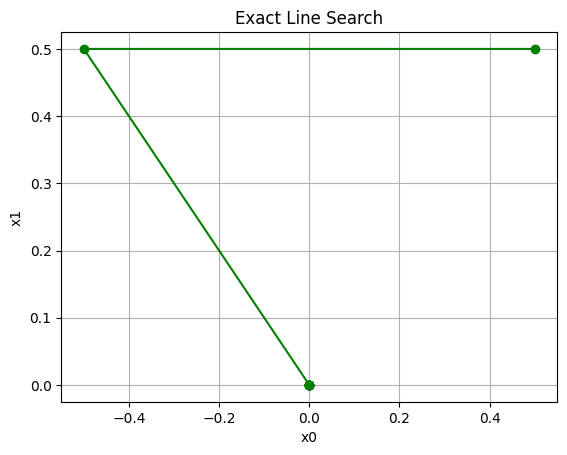

In [52]:
# Number of iterations
n = 10

# Use this alpha for every line search
alpha = symbols('a')

# Initialize xs
xs = np.zeros((n+1, 2))
xs[0] = x_start

# Get gradient at start location (df/dx or grad(f))
epsilon = 0.0025
for i in range(n):

    # gs = dfdx(xs[i])
    # Compute search direction and magnitude (dx)
    # with dx = - grad but no line searching
    print("Iteration:", i)
    # YOUR CODE HERE

    grad = dfdx(xs[i])
    direction = -grad
    x0_new = xs[i][0] + alpha * direction[0]
    x1_new = xs[i][1] + alpha * direction[1]
    x = [x0_new, x1_new]

    if f(x).is_constant():
        print("The f(x) is constant.")
        break

    fx1 = f(x)
    print("f(x1) = ", fx1)

    dfa = sp.diff(fx1, alpha)
    sol = sp.solve(dfa, alpha)

    # Filter real, positive solutions
    sol = [s.evalf() for s in sol if s.is_real and s > 0]

    print("alpha", sol)

    if not sol:  # Check if the solution list is empty
        print("No valid step size found, stopping.")
        break

    x_next = xs[i] + sol[0] * direction

    xs[i+1] = x_next
    print("New values =", xs[i+1])

    vec_norm = np.linalg.norm(dfdx(xs[i]))
    print("Vector norm:", vec_norm)
    print('')
    if (vec_norm < epsilon):
        print("Optimum value of alpha is:", sol)
        print('')
        print("The derived optimal solution is:", xs[i+1])
        print('')
        print("The minima of the given function is:", f(xs[i+1]))
        print('')
        print("The total number iterations taken is:", i+1)
        break

    print('')


plt.plot(xs[:,0],xs[:,1], 'g-o')
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Exact Line Search')
plt.grid(True)
plt.show()

### Please answer the questions below to complete the experiment:





Q1. Suppose we are trying to minimize the function $f(x, y) = 4x^{2} – 4xy + 2y^{2}$. Starting from $x^{(0)} = (2, 3)^{T}$, compute the step size $\alpha$ in the first iteration of steepest descent procedure with exact line search and also calculate $x^{(1)}$.

Hint: Please solve the problem manually and if you want to use the exact line search algorithm, do make the necessary changes to the code given in the assignment.

**Options**

A. $\alpha = 0.5$,  $x^{(1)} = (0, 1)^T$

B. $\alpha = 0.5$,  $x^{(1)} = (1, 0)^T$

C. $\alpha = 0.5$, $x^{(1)} = (0, -1)^T$

D. $\alpha = 0.5$, $x^{(1)} = (-1, -1)^T$



In [ ]:
#@title Q.1. Solve the above problem { run: "auto", form-width: "500px", display-mode: "form" }
Answer1 = "" #@param ["","Only A","Only B","Only C", "Only D"]



#### Consider the following statements about Newton's Algorithm and answer Q.2.

A. Convergence of the algorithm depends heavily on the starting point.

B. The Hessian needs to be invertible at every iterate $x_{k}$.

C. The Hessian need not be invertible at every iterate $x_{k}$.


In [ ]:
#@title Q.2. Which of the above statements is/are drawbacks of Newton's Algorithm? { run: "auto", form-width: "500px", display-mode: "form" }
Answer2 = "" #@param ["","Only A","Only B","Only C","Both A and C","Both A and B"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")